

## Visualization of REAL inputs to tuyere outputs, and feature ranking

REAL data

Most inputs

Outputs:

NO DATA!

In [1]:
#######################################################
##
## Visualization of regression models for system control
##
#######################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import yellowbrick

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score


#######################################################

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

#######################################################

In [2]:
REAL_raw_data = pd.read_csv('REAL.6.2022.csv') 

In [3]:
headers_list = REAL_raw_data.columns.values.tolist()
print(headers_list)
print(len(headers_list))


for i, name in enumerate(headers_list):
    print((i, name))

['time', 'i_pul_coal_inj_kg_thm', 'i_nat_gas_inj_kg_thm', 'i_nat_gas_t_k', 'i_o2_vol_perce', 'i_bf_windrate_nm3_hr', 'i_hb_moist_g_nm3', 'i_hot_blast_press_pa', 'i_hot_blast_temp_k', 'o_tuyere_exit_velocity_m_s', 'o_tuyere_t_k', 'o_raceway_flame_temp_k', 'o_raceway_coal_burn_perce', 'o_raceway_vol_m', 'o_raceway_depth_m', 'o_shaft_co_utiliz', 'o_shaft_h2_utiliz', 'o_shaft_top_gas_temp_c', 'o_shaft_press_drop_pa', 'o_shaft_coke_rate_kg_thm', 'o_shaft_cohesive_zone_tip_height_m', 'o_shaft_cohes_zone_root_height_m', 'o_shaft_co_v_perce', 'o_shaft_co2_v_perce', 'o_shaft_h2_v_perce', 'o_shaft_n2_v_perce']
26
(0, 'time')
(1, 'i_pul_coal_inj_kg_thm')
(2, 'i_nat_gas_inj_kg_thm')
(3, 'i_nat_gas_t_k')
(4, 'i_o2_vol_perce')
(5, 'i_bf_windrate_nm3_hr')
(6, 'i_hb_moist_g_nm3')
(7, 'i_hot_blast_press_pa')
(8, 'i_hot_blast_temp_k')
(9, 'o_tuyere_exit_velocity_m_s')
(10, 'o_tuyere_t_k')
(11, 'o_raceway_flame_temp_k')
(12, 'o_raceway_coal_burn_perce')
(13, 'o_raceway_vol_m')
(14, 'o_raceway_depth_m')
(

In [4]:
REALdata_np = REAL_raw_data.to_numpy()

print(REALdata_np.shape)

(128281, 26)


In [5]:
#######################################################

input_indeces  = [0, 1, 2, 3, 4, 5, 6, 7, 8]
output_indeces = [9, 10]                           

#######################################################

X = REALdata_np[:, input_indeces]

y = REALdata_np[:, output_indeces]

print(X.shape)
print(y.shape)

(128281, 9)
(128281, 2)


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

## Residuals plot

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.

(128281, 9)
(128281, 1)


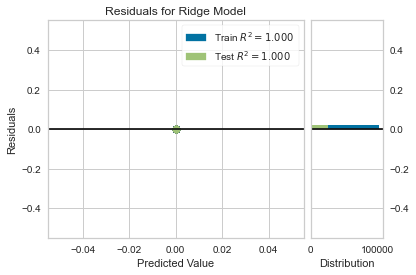

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [7]:
###################################################
# Load a regression dataset

input_indeces  = [0, 1, 2, 3, 4, 5, 6, 7, 8]
output_indeces = [9]                           

#######################################################

X = REALdata_np[:, input_indeces]
y = REALdata_np[:, output_indeces]

###################################################

print(X.shape)
print(y.shape)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

(128281, 9)
(128281, 1)


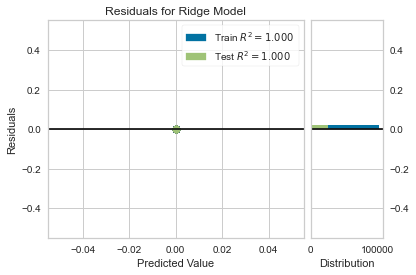

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [8]:
###################################################
# Load a regression dataset

input_indeces  = [0, 1, 2, 3, 4, 5, 6, 7, 8]
output_indeces = [10]                           

#######################################################

X = REALdata_np[:, input_indeces]
y = REALdata_np[:, output_indeces]

###################################################

print(X.shape)
print(y.shape)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure